In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)



import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=1e-3)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)





tensor(0.0075, grad_fn=<NllLossBackward>)
tensor(0.6675, grad_fn=<NllLossBackward>)
tensor(0.0262, grad_fn=<NllLossBackward>)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
        return x
    
net = Net()
print(net)

X = torch.rand(28, 28)
X = X.view(-1, 28*28)
output = net(X)
output

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total += 1
print("Accuracy: ", round(correct/total, 3))


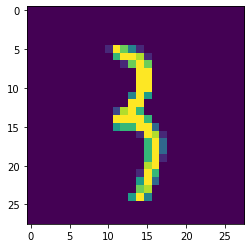

In [15]:

import matplotlib.pyplot as plt
plt.imshow(X[5].view(28, 28))


In [16]:
print(torch.argmax(net(X[5].view(-1, 784))[0]))

tensor(3)
